In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns

In [2]:
data = pd.read_csv ("russia_alcohol.csv")

In [3]:
data.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [5]:
AVRwine = data.groupby(['year'])['wine'].mean()
AVRbeer = data.groupby(['year'])['beer'].mean()
AVRvodka = data.groupby(['year'])['vodka'].mean()

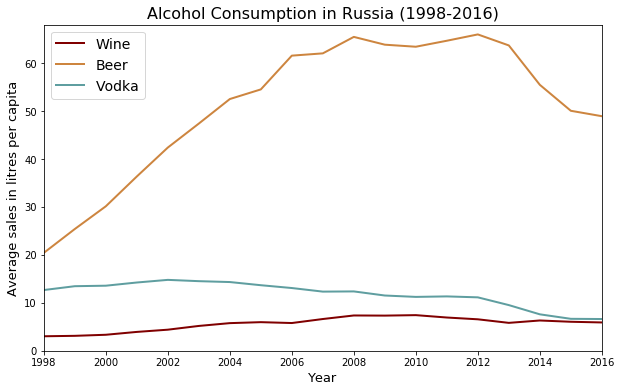

In [14]:
date_index = data['year'].unique()

plt.figure(figsize=(10, 6))
plt.plot(date_index, AVRwine, color = 'maroon', linewidth = 2)
plt.plot(date_index, AVRbeer, color = 'peru', linewidth = 2)
plt.plot(date_index, AVRvodka, color = 'cadetblue', linewidth = 2)

plt.legend(['Wine', 'Beer', 'Vodka'],loc=2, fontsize = 14, frameon=True)

ax = plt.gca()
ax.axis([1998,2016,0,68])

plt.xlabel("Year", fontsize = 13)
plt.ylabel('Average sales in litres per capita', fontsize=13)

plt.title("Alcohol Consumption in Russia (1998-2016)", fontsize = 16)
plt.show()

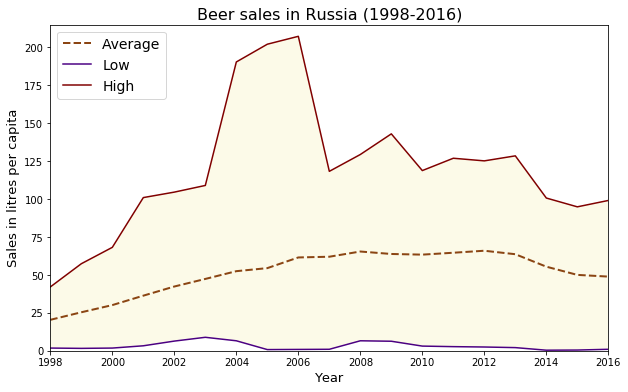

In [64]:
date_index = data['year'].unique()

MAX = data.groupby(['year'])['beer'].max()
MIN = data.groupby(['year'])['beer'].min()

plt.figure(figsize=(10, 6))
plt.plot(date_index, AVRbeer, color = 'saddlebrown', linestyle = "--", linewidth = 2)
plt.plot(date_index, MIN,color='indigo', linewidth=1.5) 
plt.plot(date_index, MAX,color='maroon', linewidth=1.5)

plt.gca().fill_between(date_index, MAX, MIN, facecolor='khaki', alpha=0.20)


plt.legend(['Average','Low', "High"],loc=2, fontsize = 14, frameon=True)

ax = plt.gca()
ax.axis([1998,2016,0,215])

plt.xlabel("Year", fontsize = 13)
plt.ylabel('Sales in litres per capita', fontsize=13)

plt.title("Beer sales in Russia (1998-2016)", fontsize = 16)
plt.show()

In [31]:
data2016 = data[(data.year ==2016)]
data2016.to_csv(r'data2016.csv', index = False)

In [8]:
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
data2016.to_excel(writer, sheet_name='Sheet1')
writer.save()